<a href="https://colab.research.google.com/github/allie-touchstone/Advanced-Machine-Learning/blob/main/MIS382N_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 18th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Avery Shepherd

EID: ams9694

Name: Allie Touchstone

EID: awt529


# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_of_coefs = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum
        
        self.change = np.zeros(self.coef.shape)

    def rmsprop(self, gradient):
        # update the moving average of the squared gradient
        sg = gradient**2.0
        self.cache = (self.cache * self.gama) + (sg * (1.0-self.gama))

        # get new step size weight
        alpha = (self.learning_rate / (self.eps + np.sqrt(self.cache)))

        self.coef = self.coef - (alpha*gradient)
    
    def sgd_momentum(self, gradient):
        
        self.change = (self.learning_rate*gradient) + (self.mu*self.change)
        # update coefficients
        self.coef = self.coef -  self.change

    def fit(self, X, y, update_rule='sgd_momentum', plot=False):

        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error, yhat - y
                x = X[i,:]
                e = self.linearPredict(x) - y[i]

                # Compute gradients
                gradient = np.array([2*e*x[0] + 2*self.regularization*self.coef[0],
                                     2*e*x[1] + 2*self.regularization*self.coef[1], 
                                     2*e*x[2] + 2*self.regularization*self.coef[2], 
                                     2*e*x[3] + 2*self.regularization*self.coef[3],
                                     2*e*x[4] + 2*self.regularization*self.coef[4],
                                     2*e*x[5] + 2*self.regularization*self.coef[5]])
               
                # Update weights
                if update_rule == 'sgd_momentum':
                  self.sgd_momentum(gradient)
                elif update_rule == 'rmsprop':
                  self.rmsprop(gradient)
                else:
                  return 'Please put valid update rule'

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)  
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]

        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
       x = np.zeros((X.shape[0], num_of_coefs))
       x[:,0] = 1
       x[:,1] = X[:,0]
       x[:,2] = X[:,0]*X[:,1]
       x[:,3] = (X[:,0]**2)*X[:,1]
       x[:,4] = X[:,0] * (X[:,1]**2)
       x[:,5] = X[:,1]**3
       
       return x
        
    def linearPredict(self, X_features):
       return X_features @ self.coef

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving SGD_samples.csv to SGD_samples.csv
Saving sales_data.csv to sales_data.csv
Saving Q3_train_dataset.csv to Q3_train_dataset.csv
Saving Q3_test_dataset.csv to Q3_test_dataset.csv


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

### SGD Momentum

In [ ]:
all_mse = []
for i in range(len(learning_rate)):
  for j in range(len(regularization)):
    reg = LinearRegression(learning_rate[i], regularization[j], n_epochs)
    reg.fit(X, y)
    all_mse.append([learning_rate[i], regularization[j], reg.lowest_mse])
all_mse = np.array(all_mse)
top_2 = all_mse[all_mse[:, 2].argsort()][:2]
top_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/pyt

array([[0.0001    , 0.        , 0.02033811],
       [0.001     , 0.        , 0.0203509 ]])

MSE of learning rate: 0.0001 and regularization: 0.0 is 0.020338107645762996


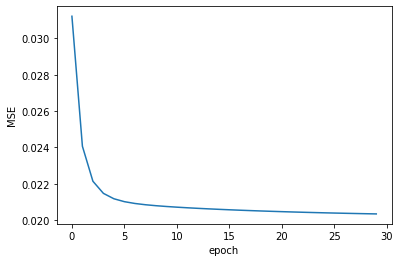

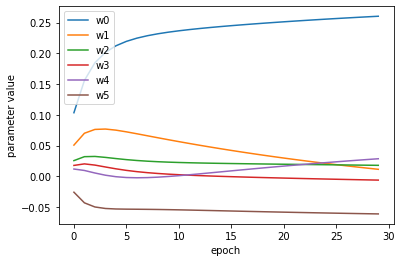

MSE of learning rate: 0.001 and regularization: 0.0 is 0.02035089879229265


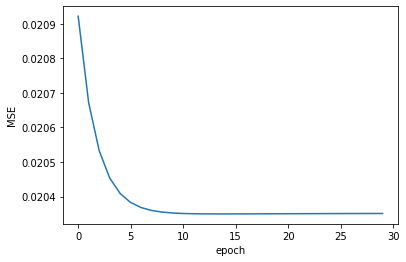

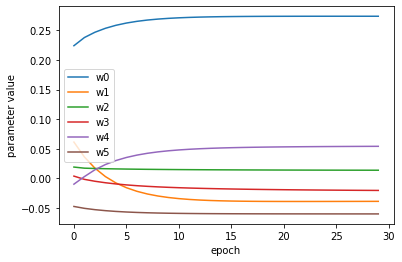

In [ ]:
reg = LinearRegression(top_2[0][0], top_2[0][1], n_epochs)
reg.fit(X, y, plot = True)
print('MSE of learning rate:', top_2[0][0], 'and regularization:', top_2[0][1], 'is', reg.lowest_mse)
plt.show()

reg = LinearRegression(top_2[1][0], top_2[1][1], n_epochs)
reg.fit(X, y, plot = True)
print('MSE of learning rate:', top_2[1][0], 'and regularization:', top_2[1][1], 'is', reg.lowest_mse)
plt.show()

### RMSProp

In [ ]:
all_mse = []
for i in range(len(learning_rate)):
  for j in range(len(regularization)):
    reg = LinearRegression(learning_rate[i], regularization[j], n_epochs)
    reg.fit(X, y, 'rmsprop')
    all_mse.append([learning_rate[i], regularization[j], reg.lowest_mse])
all_mse = np.array(all_mse)
top_2 = all_mse[all_mse[:, 2].argsort()][:2]
top_2

array([[0.001     , 0.        , 0.02020237],
       [0.001     , 0.01      , 0.02033151]])

MSE of learning rate: 0.001 and regularization: 0.0 is 0.020202367892380203


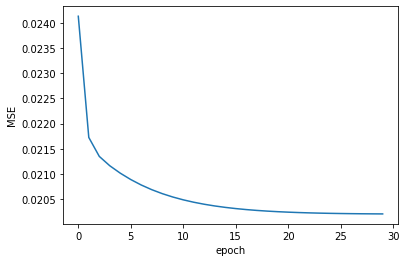

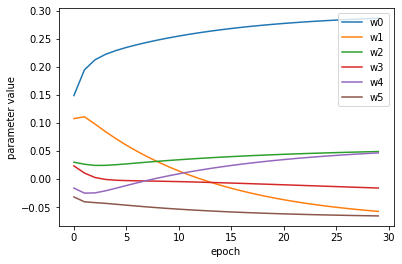

MSE of learning rate: 0.001 and regularization: 0.01 is 0.020331512560002714


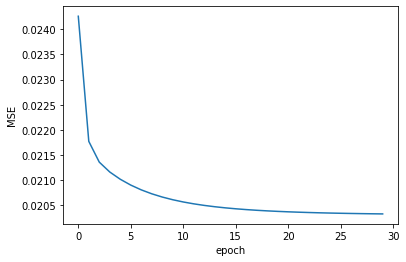

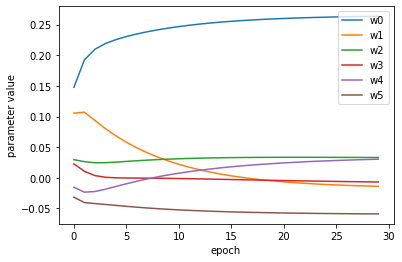

In [ ]:
reg = LinearRegression(top_2[0][0], top_2[0][1], n_epochs)
reg.fit(X, y, 'rmsprop', plot = True)
print('MSE of learning rate:', top_2[0][0], 'and regularization:', top_2[0][1], 'is', reg.lowest_mse)
plt.show()

reg = LinearRegression(top_2[1][0], top_2[1][1], n_epochs)
reg.fit(X, y, 'rmsprop', plot = True)
print('MSE of learning rate:', top_2[1][0], 'and regularization:', top_2[1][1], 'is', reg.lowest_mse)
plt.show()

# Answer:

#Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:
a) Tanh:  
* Training Loss: 0.282
* Test Loss: 0.296

Linear:
* Training Loss: 0.499
* Test Loss: 0.500

In the linear example, there is only one boundary line (as it needs to be linear) which makes the confidence of the predictions very low. In the tanh example there are 2 boundary lines, which allows the lines to make more concerete boundaries, which generated a higher confidence in the prediction level. This is absolutely due to the activation function used, as the activation function tells you how many boundary lines there can be.

b) 4 Neurons:
* Training Loss: 0.024
* Test Loss: 0.007

8 Neurons:
* Training Loss: 0.031
* Test Loss: 0.004

The decision boundaries in the 4 neuron run are much more rigid than the ones in the 8 neuron run. The boundary lines in the 8 neuron run move and curve more with the values, making the lines more specified to each section of points. I think this is because of the increase in neurons as with more neurons, there are more lines being taken into consideration which allows each section of points to have a more specified boundary. As well, when more neurons are in play, the boundray lines are much more clearly marked. This is letting us know that there is also more condifence in the prediction of the values around the lines when there are more neurons.

c) Learning Rate: 10

Recorded as: (100 epochs, 1000 epochs) 
* Training Loss: (0.504, 0.504)
* Test Loss: (0.539, 0.535) 

Learning Rate: 1

Recorded as: (100 epochs, 1000 epochs) 
* Training Loss: (0.000, 0.000)
* Test Loss: (0.012, 0.010) 

Learning Rate: 0.1

Recorded as: (100 epochs, 1000 epochs) 
* Training Loss: (0.008, 0.000)
* Test Loss: (0.019, 0.008) 

Learning Rate: 0.01

Recorded as: (100 epochs, 1000 epochs) 
* Training Loss: (0.088, 0.007)
* Test Loss: (0.120, 0.018)

Learning Rate: 0.001

Recorded as: (100 epochs, 1000 epochs) 
* Training Loss: (0.356, 0.081)
* Test Loss: (0.364, 0.102) 

In regard to change of loss with learning rate, there appears to be a best learning rate to work with for each trial ran. In this case it is a learning rate of 1, because if you look at learning rate of 10 or learning rate of 0.1, the losses become larger. In regard to the change of loss and number of epochs, the larger number of epochs gives better losses. This makes sense as there were more epochs, so there were more tests to find the better results.  

d) There are more properties being led in by the features being more and different. The addition of more features helped get the losses to 0 in fewer epochs. However, those have to be the right features such as how $sin(x_1)$ didn't help any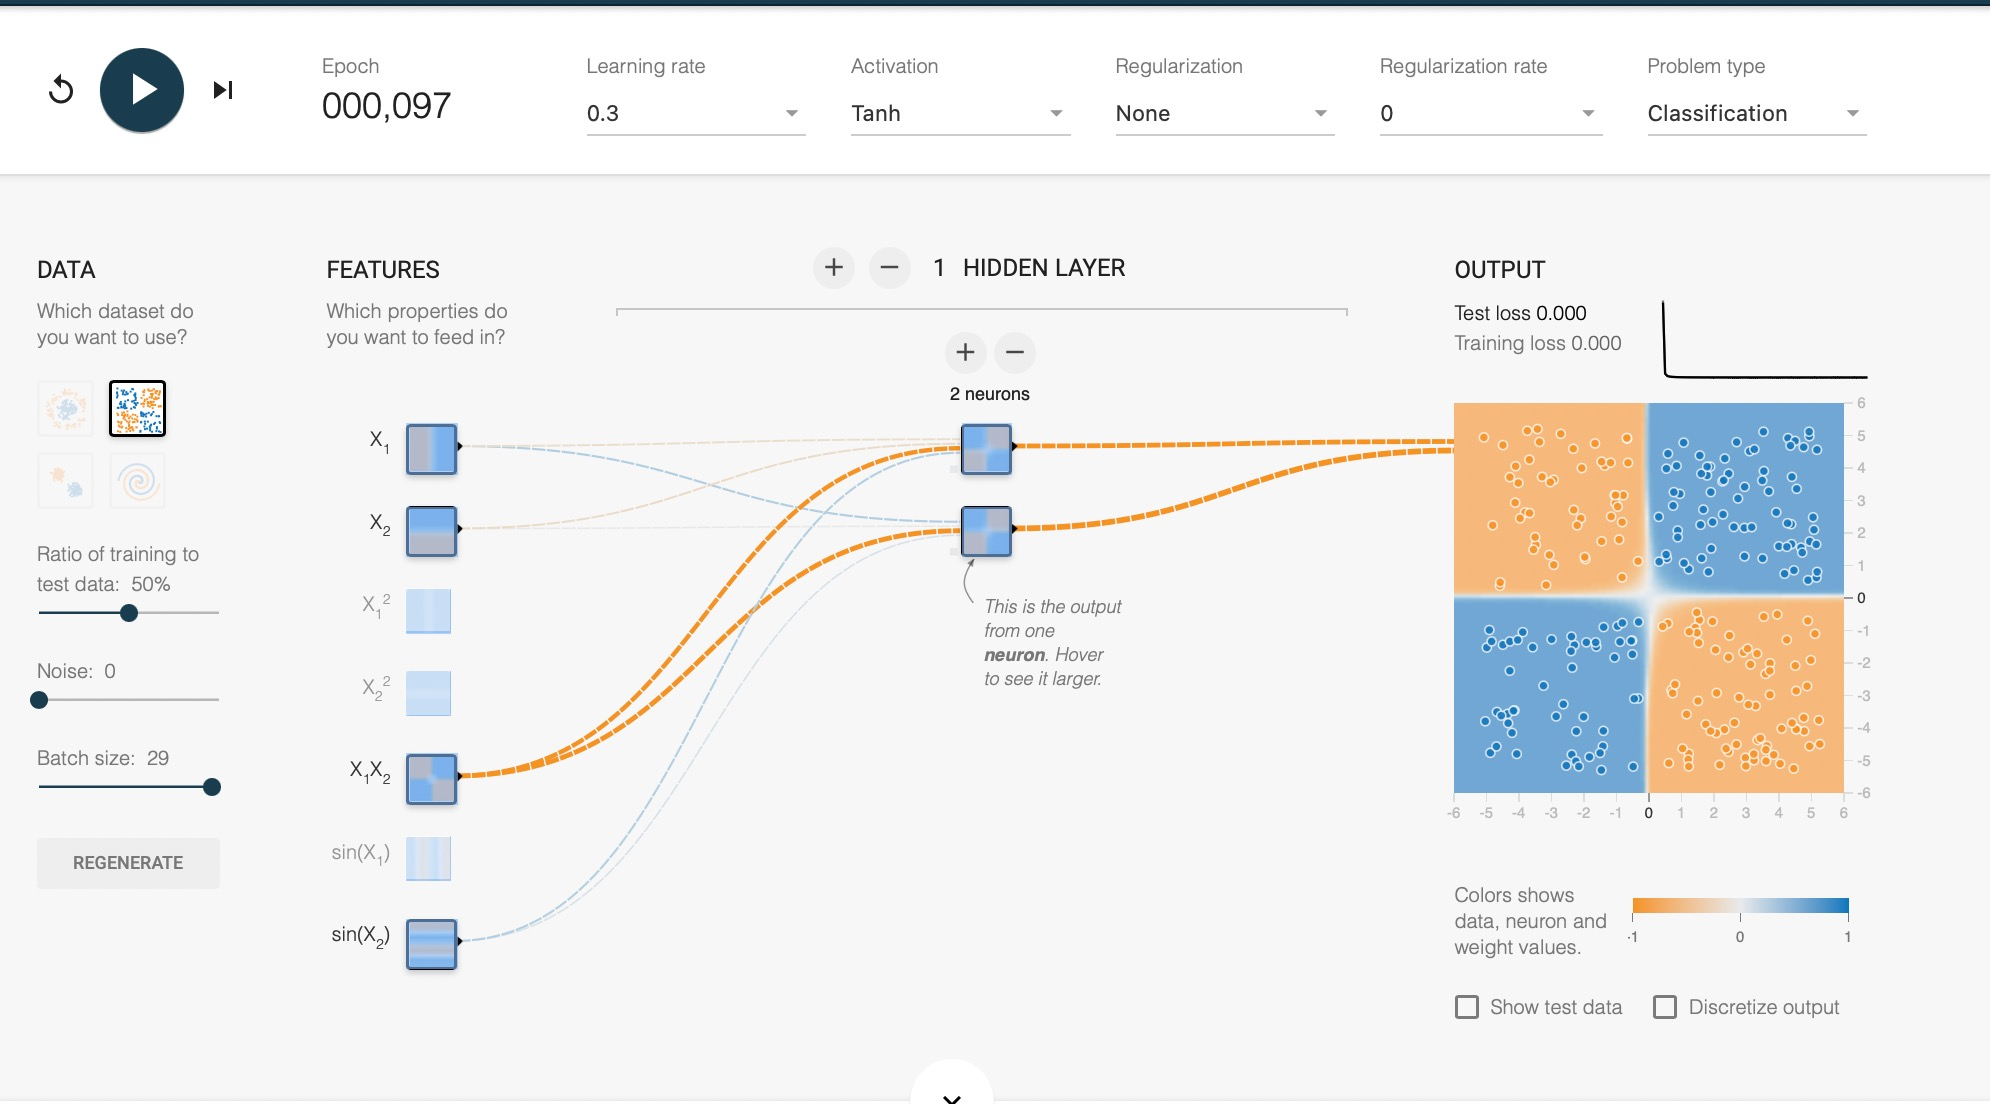.



# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

COPOD did best in terms of ROC, with CBLOF following and MCD doing the worst.
COPOD did best in terms of precision, with CBLOF and MCD having a simlar value.
From the visualizations, it seems that COPOD did best with classifying, with CBLOF following that, and MCD in last.

Overall, it seems that of the three models, COPOD model performed the best.

In [ ]:
# install pyod using pip first
!pip install pyod

     |████████████████████████████████| 111 kB 32.9 MB/s 
  Created wheel for pyod: filename=pyod-0.9.4-py3-none-any.whl size=130726 sha256=6098f63f8fc7801bc4ac5c52c04a4edec33e11dabe7d7ec498a1c1da27ffebb5
  Stored in directory: /root/.cache/pip/wheels/50/32/84/d64079e8bf087c1b231c9beecfa9abc08592ab5f5f333124cd
Successfully built pyod


In [ ]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [ ]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train
clf.fit(X_train)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [ ]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results

pred = clf.decision_function(X_test)
evaluate_print(clf, y_test, pred)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None) ROC:0.8689, precision @ rank n:0.6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


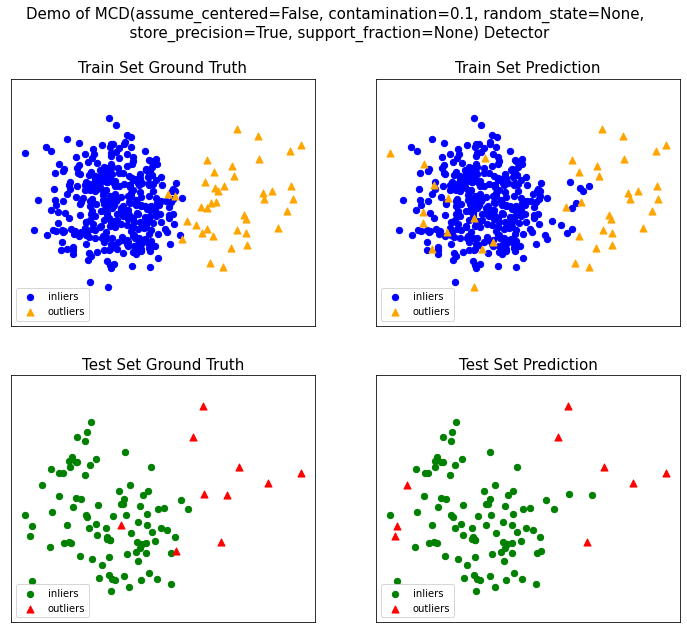

In [ ]:
# (b)
# fit_and_transform()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

from pyod.utils.example import visualize

visualize(clf, train_principalComponents, y_train, test_principalComponents, y_test, clf.predict(X_train), clf.predict(X_test))

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) ROC:0.9044, precision @ rank n:0.6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


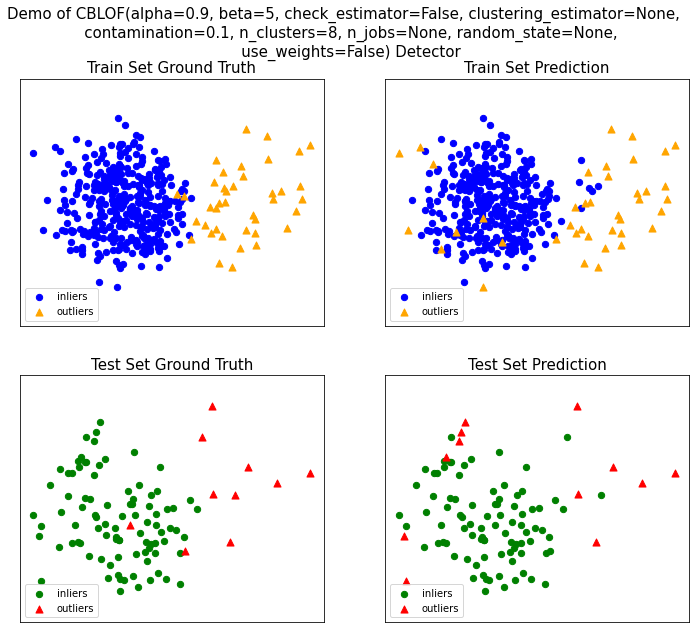

In [ ]:
# (c)
from pyod.models.cblof import CBLOF
cblof = CBLOF()
cblof.fit(X_train)
pred = cblof.decision_function(X_test)
evaluate_print(cblof, y_test, pred)

pca = PCA(n_components=2)

train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

visualize(cblof, train_principalComponents, y_train, test_principalComponents, y_test, cblof.predict(X_train), cblof.predict(X_test))

COPOD(contamination=0.1, n_jobs=1) ROC:0.9556, precision @ rank n:0.8


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


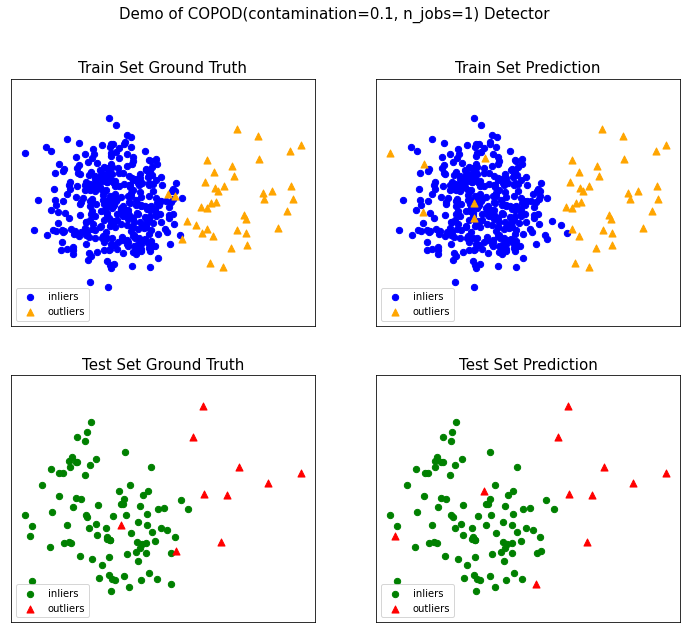

In [ ]:
from pyod.models.copod import COPOD
copod = COPOD()
copod.fit(X_train)
pred = copod.decision_function(X_test)
evaluate_print(copod, y_test, pred)

pca = PCA(n_components=2)

train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

visualize(copod, train_principalComponents, y_train, test_principalComponents, y_test, copod.predict(X_train), copod.predict(X_test))

#Question 4: PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:
PCA is mainly used to visualize high-dimensional data by reducing data dimensionality to keep the most relevant data. The purpose of using covariance is to show how different features are related (correlated). As well, through the use of covariance, Eigenvectors can be found. Eigenvectors of the covariance matrix represent the principal components, and the eigenvalues define their magnitudes. Using the eigenvalues, you can identify the most important values, optimizing the algorithm by focusing on the most prominate pairwise features. 



# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [ ]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,Gd,706,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,2,548,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,TA,978,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,2,460,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,Gd,486,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,2,608,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,TA,216,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,3,642,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,Gd,655,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,3,836,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a) **(2 pts)** Print the number of NaN values in each column.


In [ ]:
data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Alley            1369
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
ExterQual           0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeatur

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [ ]:
data_dm=data.copy()

data_dm.drop(data_dm[data_dm['YearBuilt'] < 1900].index, inplace=True)

data_dm['binned_yr_built']=pd.cut(data['YearBuilt'], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020], 
                                labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'], 
                                include_lowest=True)
data_dm.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,binned_yr_built
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,Gd,706,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,2,548,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,208500,2000-2020
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,TA,978,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,2,460,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,181500,1960-1980
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,Gd,486,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,2,608,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,223500,2000-2020
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,TA,216,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,3,642,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,140000,1900-1920
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,Gd,655,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,3,836,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,250000,1980-2000


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# creating instance of labelencoder
le = LabelEncoder()
data_dm['binned_yr_built'] = le.fit_transform(data_dm['binned_yr_built'])

# one hot encoding
enc = OneHotEncoder()
encoded = pd.DataFrame(enc.fit_transform(data_dm[['binned_yr_built']]).toarray())
data_dm = data_dm.join(encoded)
data_dm

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,binned_yr_built,0,1,2,3,4,5
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,Gd,706,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,2,548,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,208500,5,0.0,0.0,0.0,0.0,0.0,1.0
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,TA,978,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,2,460,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,181500,3,0.0,0.0,0.0,1.0,0.0,0.0
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,Gd,486,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,2,608,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,223500,5,0.0,0.0,0.0,0.0,0.0,1.0
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,TA,216,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,3,642,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,140000,0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,Gd,655,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,3,836,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,250000,4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,NaN,6,5,1999,2000,0.0,TA,0,0,953,953,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,2,460,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,175000,4,NaN,NaN,NaN,NaN,NaN,NaN
1456,20,RL,85.0,13175,NaN,6,6,1978,1988,119.0,TA,790,163,589,1542,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,2,500,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,210000,3,NaN,NaN,NaN,NaN,NaN,NaN
1457,70,RL,66.0,9042,NaN,7,9,1941,2006,0.0,Ex,275,0,877,1152,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,1,252,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,266500,2,NaN,NaN,NaN,NaN,NaN,NaN
1458,20,RL,68.0,9717,NaN,5,6,1950,1996,0.0,TA,49,1029,0,1078,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,1,240,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,142125,2,NaN,NaN,NaN,NaN,NaN,NaN



c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [ ]:
def percent_missing(col):
    percent = col.isnull().sum() * 100 / len(col)
    if percent > 65:
        return True
    else:
        return False

mask = data_dm.apply(percent_missing, axis = 0)

data_dm = data_dm.T.drop(data_dm.T[mask].index).T
data_dm

,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,binned_yr_built,0,1,2,3,4,5
0,60,RL,65,8450,7,5,2003,2003,196,Gd,706,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,2,548,0,61,0,0,0,0,0,2,2008,208500,5,0,0,0,0,0,1
1,20,RL,80,9600,6,8,1976,1976,0,TA,978,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,2,460,298,0,0,0,0,0,0,5,2007,181500,3,0,0,0,1,0,0
2,60,RL,68,11250,7,5,2001,2002,162,Gd,486,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,2,608,0,42,0,0,0,0,0,9,2008,223500,5,0,0,0,0,0,1
3,70,RL,60,9550,7,5,1915,1970,0,TA,216,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,3,642,0,35,272,0,0,0,0,2,2006,140000,0,1,0,0,0,0,0
4,60,RL,84,14260,8,5,2000,2000,350,Gd,655,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,3,836,192,84,0,0,0,0,0,12,2008,250000,4,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62,7917,6,5,1999,2000,0,TA,0,0,953,953,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,2,460,0,40,0,0,0,0,0,8,2007,175000,4,NaN,NaN,NaN,NaN,NaN,NaN
1456,20,RL,85,13175,6,6,1978,1988,119,TA,790,163,589,1542,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,2,500,349,0,0,0,0,0,0,2,2010,210000,3,NaN,NaN,NaN,NaN,NaN,NaN
1457,70,RL,66,9042,7,9,1941,2006,0,Ex,275,0,877,1152,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941,1,252,0,60,0,0,0,0,2500,5,2010,266500,2,NaN,NaN,NaN,NaN,NaN,NaN
1458,20,RL,68,9717,5,6,1950,1996,0,TA,49,1029,0,1078,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950,1,240,366,0,112,0,0,0,0,4,2010,142125,2,NaN,NaN,NaN,NaN,NaN,NaN



d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [ ]:
np.random.seed(6)
sample_ages = np.random.choice(a= data_dm['SalePrice'], size=800)
#Sample mean
print('sample mean')
print(sample_ages.mean())
print()

#Population mean
print('population mean')
print(data_dm['SalePrice'].mean())
print()

print('difference between sample and population')
sample_ages.mean() - data_dm['SalePrice'].mean()

sample mean
178292.63125

population mean
180921.19589041095

difference between sample and population


-2628.564640410943

e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [ ]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

sample_mean

#Get the critical Z value
import scipy.stats

z_critical = scipy.stats.norm.ppf(1-.05/2)


#Get population standard deviation
import statistics
pop_stdev = statistics.stdev(data_dm['SalePrice'])


#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Print confidence interval and true mean value
print('confidence interval:', confidence_interval)
print('true mean value:', data_dm['SalePrice'].mean())

confidence interval: (165029.83072414564, 196040.86927585438)
true mean value: 180925.99792387543


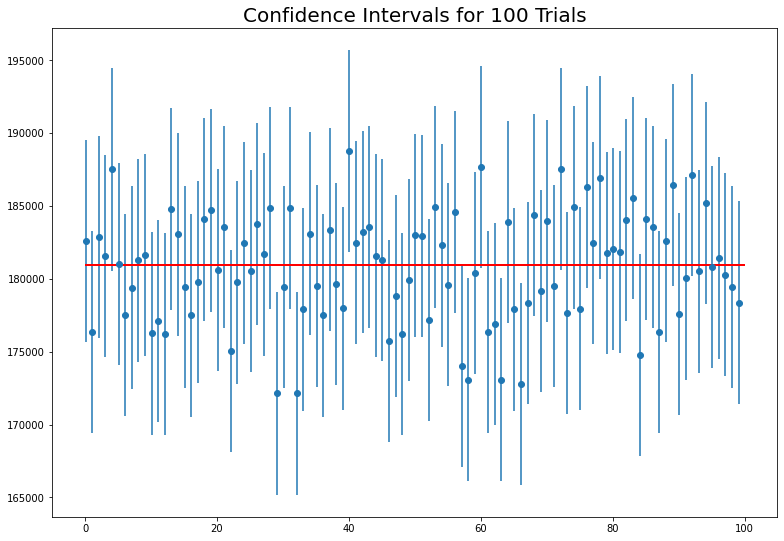

In [ ]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value
    z_critical = scipy.stats.norm.ppf(1-.05/2)
    # compute population standard deviation     
    pop_stdev = statistics.stdev(data_dm['SalePrice'])

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=100,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()